# WeRateDogs Twitter Account Dataset - Data Wrangling, Cleaning and Analyzation Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#obs">Observations</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#store">Storing</a></li>
<li><a href="#viz">Visualization</a></li>   
<li><a href="#ref">References</a></li>
</ul>



<a id='intro'></a>

# INTRODUCTION

## Project Details

- Data wrangling, which consists of:
    - Gathering data 
        1. From 'twitter-archive-enhanced.csv' file.
        2. From a [link]('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').
        3. From twitter API.
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing the wrangled data
- Reporting on: 
    1. Data wrangling efforts. 
    2. Data analyses and visualizations

<a id='gather'></a>
# GATHERING

In [2]:
# Importing all Libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
from twitter_api import get_twitter_data
import json
from PIL import Image
from io import BytesIO
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Loading the 'twitter-archive-enhanced.csv' file

twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Downloading the image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('data/' + url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [5]:
# Loading the 'image-predictions.tsv' file
img_pred = pd.read_csv('data/image-predictions.tsv', sep='\t')

<div class="alert alert-block alert-info">
    <b>`tweet-json.txt`</b> was obtain from the Udacity Classroom resources because of an issue with getting the Twitter Developer account
</div>

In [6]:
#load tweets data into pandas df
with open('data/tweet-json.txt') as file:
    twitter_json = pd.read_json(file, lines= True, encoding = 'utf-8')

<a id='assess'></a>

# ASSESSING

## ASSESSMENT OF `twitter-archive-enhanced.csv` FILE

### VISUAL ASSESSMENT

In [7]:
# Assessing the first 5 rows of the 'twitter-archive-enhanced.csv' file
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# Sampling the 'twitter-archive-enhanced.csv' file
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737...,13,10,None,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
894,759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None,None,None,None
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@JODYHiGHROLLER it may be an 11/10 but what do...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1082,738883359779196928,NaN,NaN,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738883359...,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
1230,713411074226274305,NaN,NaN,2016-03-25 17:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713411074...,11,10,None,None,None,None,None
392,826115272272650244,NaN,NaN,2017-01-30 17:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ike. He's demonstrating the pupmost re...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826115272...,13,10,Ike,None,None,None,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
1562,688211956440801280,NaN,NaN,2016-01-16 04:11:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derby. He's a superstar. 13/10 (vid by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688211956...,13,10,Derby,None,None,None,None


It can be observed that `name`, `doggo`, `floofer`, `pupper` and `puppo` have 'None' for null values

### PROGRAMMATIC ASSESSMENT

In [9]:
# Getting the summarized details of each column of the 'twitter-archive-enhanced.csv' file
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Some columns are having missing values as well as wrong datatypes

In [10]:
# Getting a summary statistics of the 'rating_numerator'and
# 'rating_denominator' columns of the'twitter-archive-enhanced.csv' file
twitter_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The rating denominator should not be less or more than 10.

In [11]:
# looking for numerators with wrong values in the 'twitter-archive-enhanced.csv' file
twitter_arch[twitter_arch.rating_numerator <= 5].loc[0:, :].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,None,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
2202,668643542311546881,NaN,NaN,2015-11-23 04:13:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Fascinating dog here. Loves beach. Oddly long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668643542...,3,10,None,None,None,None,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None


Some rows do have rating denominators to be less than 10

In [12]:
# Checking for the unique names if the 'twitter-archive-enhanced.csv' file
twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Names such as 'a', 'all', 'his' etc cannot be dog names as seen in the `name` column

In [13]:
# Checking the value counts of each unique name in the 'twitter-archive-enhanced.csv' file
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

It is observed that some of the names are in lower cases. Let's further find those names out.

In [14]:
# Checking names that start with lower cases in the 'twitter-archive-enhanced.csv' file
twitter_arch[twitter_arch.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


## ASSESSMENT OF `image-predictions.tsv` FILE

### VISUAL ASSESSMENT

In [15]:
# Checking the first five rows of the `image-prediction.tsv` file
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# Sampling five rows of the `image-prediction.tsv` file
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
217,670069087419133954,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,boathouse,0.313829,False,birdhouse,0.138331,False,ashcan,0.045673,False
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False
1335,758041019896193024,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,bookshop,0.794272,False,Cardigan,0.051265,True,Bernese_mountain_dog,0.026596,True


What at all is `img_num` and what role is it playing in the dataset? `p1`, `p2` and `p3` columns seem to be about the same thing

### PROGRAMMATIC ASSESSMENT

In [17]:
# Getting the summarized details of each column of the 'image-predictions.tsv' file
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There seem to be no null entry in this dataset.

In [18]:
# Checking the value counts of each unique `img_num` in the 'image-predictions.tsv' file
img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

The `img_num` column seem to have only values of 1 to 4.

In [19]:
# Checking for the unique names in the `p1` column of the 'image-predictions.tsv' file
img_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

Names in `p1` columns as well as the `p2` and `p3` start with lower case letter.

## ASSESSMENT OF `tweet-json.txt` FILE

### VISUAL ASSESSMENT

In [20]:
# Checking the first five rows of the `tweet-json.txt` file
twitter_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [21]:
# Sampling five rows of the `tweet-json.txt` file
twitter_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1490,2016-01-28 21:54:41+00:00,692828166163931137,692828166163931136,This pupper just descended from heaven. 12/10 ...,False,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692828155242004480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3148,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
517,2016-12-19 01:26:42+00:00,810657578271330305,810657578271330304,This is Pavlov. His floatation device has fail...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810657562332954624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12192,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
181,2017-04-24 20:17:23+00:00,856602993587888130,856602993587888128,RT @dog_rates: This is Luna. It's her first ti...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Mar 23 00:18:10 +0000 2017...,NaN,NaN,NaN
440,2017-01-13 01:03:12+00:00,819711362133872643,819711362133872640,This is Howie. He just bloomed. 11/10 revoluti...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819711336993198081, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14916,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
679,2016-10-20 01:03:11+00:00,788908386943430656,788908386943430656,"This is Lucy. She destroyed not one, but two r...",False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 788908364977823744, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30653,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


The `id` column here seem to have a different name from the previous datasets.

### PROGRAMMATIC ASSESSMENT

In [22]:
# Checking the info on the columns of the `tweet-json.txt` file
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Are all these 30 columns relevant? Most of them also have missing values.

In [23]:
# Checking the value counts of the languages used in the `tweet-json.txt` file
twitter_json.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

English language appears to be the most used language in the dataset.

<a id='obs'></a>

# OBSERVATIONS
The following observations were maden through the visual and programmatic assessments made.

### Quality

<ol>
<li> Columns (`doggo`, `floofer`, `pupper`, `puppo`) have `None` for missing values.</li>
 <li>The `source` column is html tag `&lta&gt` we can extract the source of the tweet and covert it to categorical.</li>
 <li>`text` column has the link for the tweets and ratings at the end which can be removed.</li>
 <li>`timestamp` column is `str` instead of `datetime`</li>
 <li>The `rating_numerator` column should of type `float` and also it should be correctly extracted.</li>
 <li>`rating_denominator` column has values less than 10 and values more than 10 for ratings more than one dog.</li>
 <li>`expanded_urls` column has NaN values</li>
 <li>`id` column in twitter_json name different than the other 2 data sets.</li>
<li>`name` column have None instead of NaN and too many unvalid values.</li>
</ol>

## Tidiness

<font color=#0877cc size=4>**twitter_arch**</font>
- `doggo`, `floofer`, `pupper`, `puppo` columns are all about the same things, which is categories.

<font color=#0877cc size=4>**img_pred**</font>
- `img_num` does not have any usage in the dataset.
- the columns (`p1`, `p1_dog`, `p1_conf`, ...etc) need to just be `breed` and `confidence`.

<font color=#0877cc size=4>**twitter_json**</font>
- Just 3 columns needed `id`, `retweet_count`, `favorite_count` according to the documentation

<font color=#0877cc size=4>**General**</font>
- All datasets should be combined into 1 dataset only

<a id='clean'></a>

# CLEANING 

<div class="alert alert-block alert-info">
    First, copies of each dataframes need to be made before cleaning them.
</div>

In [24]:
# Making copies of each dataset
twitter_arch_copy = twitter_arch.copy()
img_pred_copy = img_pred.copy()
twitter_json_copy = twitter_json.copy()

### Define
Replace 'None' with `np.nan` for `doggo`, `floofer`, `pupper` and `puppo` columns.

### Code

In [25]:
# Replacing all 'None' values in the `doggo`, `floofer`, `pupper` and `puppo` columns.
dog_category = ['doggo', 'floofer', 'pupper', 'puppo']

for dog in dog_category:
    twitter_arch_copy[dog] = twitter_arch_copy[dog].replace('None', np.nan)

### Test

In [26]:
# Testing the sample of the replaced data
twitter_arch_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,41198418.0,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,NaN,NaN,pupper,NaN
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,NaN,NaN,NaN,NaN
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,NaN,NaN,pupper,NaN
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,NaN,NaN,pupper,NaN
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,NaN,NaN,NaN,NaN


In [27]:
# Checking the summary statistics of the `doggo`, `floofer`, `pupper` and `puppo` columns.
twitter_arch_copy[['doggo', 'floofer', 'pupper', 'puppo']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    97 non-null     object
 1   floofer  10 non-null     object
 2   pupper   257 non-null    object
 3   puppo    30 non-null     object
dtypes: object(4)
memory usage: 73.8+ KB


### Define
 Extract tweet source from `source` column using 'apply method' in pandas and then convert it to categorical datatype

### Code

In [28]:
# Checking for the unique values
twitter_arch_copy.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [29]:
#Defining a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_arch_cleaned dataset'
    # Finding the first closed  tag >
    i= x.find('>') + 1
    # Finding the first open tag after the previous <
    j =x[i:].find('<')
    # Extracting the text in between
    return x[i:][:j]

In [30]:
# Converting the `source` column to a category datatype
twitter_arch_copy.source = twitter_arch_copy.source.apply(lambda x: fix_source(x)).astype('category')

### Test

In [31]:
# Checking for unique values in the `source` column
twitter_arch_copy.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

### Define
Extract rating scores from tweet text using RegEx and convert it to float

### Code

In [32]:
# Checking the `text` column for rows that contains the texts to be extracted
twitter_arch_copy[twitter_arch_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]\
                                            [['text', 'rating_numerator']]

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12424/2251733834.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_arch_copy[twitter_arch_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]\


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [33]:
# Extracting the ratings from the text column
new_ratings = (twitter_arch_copy[twitter_arch_copy.text.str.contains
              (r"(\d+\.\d*\/\d+)")]['text'].str.extract
              (r"(\d+\.\d*(?=\/\d+))"))
new_ratings

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12424/2799690568.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  new_ratings = (twitter_arch_copy[twitter_arch_copy.text.str.contains


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [34]:
# Assigning the new ratings values to the `rating_numberator` column
twitter_arch_copy.loc[new_ratings.index, 'rating_numerator'] = new_ratings.values

In [35]:
# Converting the assigned values to float datatype
twitter_arch_copy.rating_numerator = twitter_arch_copy.rating_numerator.astype('float')

### Test

In [36]:
twitter_arch_copy.loc[new_ratings.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,None,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,NaN,NaN,NaN,NaN


In [37]:
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   float64 
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

### Define
Convert the `timestamp` column to datetime.

### Code 

In [38]:
# COnverting `timestamp` column to datatime datatype
twitter_arch_copy.timestamp = pd.to_datetime(twitter_arch_copy.timestamp)

### Test

In [39]:
# Comfirming the change of the `timestamp` datatype to datetime.
twitter_arch_copy.timestamp.dtype

datetime64[ns, UTC]

### Define
Remove values other than 10 for `rating_denominator`

### Code

In [40]:
# Removing all rows in `rating_denominator` that are not equal to 10
twitter_arch_copy = twitter_arch_copy[twitter_arch_copy['rating_denominator'] == 10]

### Test

In [41]:
# Describing the summary statistics of the `rating_numerator` 
# `rating_denominator` columns to comfirm the removal of all
# rows that are not having denominators of 10
twitter_arch_copy[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.174038,10.0
std,40.978669,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define
Remove any rows not related to dogs

### Code

In [42]:
# Checking for null values in the `text` column
twitter_arch_copy = twitter_arch_copy[~twitter_arch_copy.text.isnull()]

In [43]:
# Removing all columns that are not related to "only rate dogs"
twitter_arch_copy = twitter_arch_copy.loc[~twitter_arch_copy.text.str.match('.*only rate dogs')]

### Test

In [44]:
# Comfirming for rows that are not related to "only rate dogs"
twitter_arch_copy.loc[twitter_arch_copy.text.str.match('.*only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [45]:
# Getting a summary of the columns
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2269 non-null   int64              
 1   in_reply_to_status_id       72 non-null     float64            
 2   in_reply_to_user_id         72 non-null     float64            
 3   timestamp                   2269 non-null   datetime64[ns, UTC]
 4   source                      2269 non-null   category           
 5   text                        2269 non-null   object             
 6   retweeted_status_id         171 non-null    float64            
 7   retweeted_status_user_id    171 non-null    float64            
 8   retweeted_status_timestamp  171 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2269 non-null   float64         

### Define
Drop rows with NaNs values in the `expanded_urls` column.

### Code

In [46]:
# Locating and droping all NaNs values in the `expanded_urls` column
twitter_arch_copy = twitter_arch_copy.loc[~twitter_arch_copy.expanded_urls.isnull()]

### Test

In [47]:
# Confirming the romoval of all NaN values in the `expanded_urls` column
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2214 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   2214 non-null   datetime64[ns, UTC]
 4   source                      2214 non-null   category           
 5   text                        2214 non-null   object             
 6   retweeted_status_id         170 non-null    float64            
 7   retweeted_status_user_id    170 non-null    float64            
 8   retweeted_status_timestamp  170 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2214 non-null   float64         

### Define
Create `dog_stage` column and remove the (`doggo`, `floofer`, `pupper`, `puppo`) columns.

### Code 

In [48]:
# Selecting the dog stages columns from the dataset
dog_category = ['doggo', 'floofer', 'pupper', 'puppo']

# Creating the dog_stage column by joining the four columns
twitter_arch_copy['dog_stage'] = (twitter_arch_copy[dog_category].
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1))
# Replacing the empty string with NaN and changing the datatype to category
twitter_arch_copy.dog_stage = twitter_arch_copy.dog_stage.replace('', np.nan).astype('category')

# Droping the 4 columns
twitter_arch_copy = twitter_arch_copy.drop(columns = dog_category, axis =1)

### Test 

In [49]:
# Comfirming the merging of the four columns 'doggo', 'floofer', 'pupper' and  'puppo' to 'dog_stage'
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2214 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   2214 non-null   datetime64[ns, UTC]
 4   source                      2214 non-null   category           
 5   text                        2214 non-null   object             
 6   retweeted_status_id         170 non-null    float64            
 7   retweeted_status_user_id    170 non-null    float64            
 8   retweeted_status_timestamp  170 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2214 non-null   float64         

In [50]:
# Checking the value count of the stages of dog in the `dog_stage` column
twitter_arch_copy.dog_stage.value_counts()

pupper            243
doggo              80
puppo              28
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Define
- Replace 'None' with np.nan in twitter_arch_copy `name` column.
- Remove any rows with invalid names which starts with lower laters.

### Code

In [51]:
# Identifying unique names that are are not names of dogs in the `name` column
twitter_arch_copy[~twitter_arch_copy.name.str.istitle()].name.unique()

array(['such', 'a', 'not', 'one', 'BeBe', 'mad', 'just', 'DonDon', 'my',
       'his', 'an', 'actually', 'all', 'old', 'infuriating', 'CeCe',
       'the', 'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ',
       'quite'], dtype=object)

In [52]:
# Replacing the names that are not dogs name with NaN in the `name` column
twitter_arch_copy.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

### Test

In [53]:
# Checking for the unique names in the `name` column
twitter_arch_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

In [54]:
# Checking the value counts for each name in the `name` column
twitter_arch_copy.name.value_counts()

Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
              ..
Beckham        1
Devón          1
Gert           1
Dex            1
Christoper     1
Name: name, Length: 929, dtype: int64

In [55]:
# Checking the summary of the various columns
twitter_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2214 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   2214 non-null   datetime64[ns, UTC]
 4   source                      2214 non-null   category           
 5   text                        2214 non-null   object             
 6   retweeted_status_id         170 non-null    float64            
 7   retweeted_status_user_id    170 non-null    float64            
 8   retweeted_status_timestamp  170 non-null    object             
 9   expanded_urls               2214 non-null   object             
 10  rating_numerator            2214 non-null   float64         

### Define
Remove `img_num` column from img_pred_copy dataset.

### Code 

In [56]:
# Looking up for the columns 
img_pred_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [57]:
# Removing the `img_num` column
img_pred_copy.drop('img_num', axis=1, inplace=True)

### Test

In [58]:
# Confirming the removal of the `img_num` column
img_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Define
Create `breed` and `confidence` columns with highest confidence predictions and drop other columns

### Code 

In [59]:
# Creating an empty list of `breed` and `confidence`
breed = []
confidence = []

# Iterating over img_pred_copy row by row and taking 
# the highest confident prediction otherwise np.nan
for index, row in img_pred_copy.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
img_pred_copy['breed'] = breed
img_pred_copy['confidence'] = confidence


In [60]:
# Re-defining the new columns for the img_pred_copy dataset
img_pred_copy = img_pred_copy[['tweet_id', 'jpg_url', 'breed', 'confidence']]

### Test 

In [61]:
# Sampling the data to find out the change in columns
img_pred_copy.sample(5)

,tweet_id,jpg_url,breed,confidence
727,686377065986265092,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,German_shepherd,0.830816
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,NaN,NaN
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,NaN,NaN
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,pug,0.957365
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,Cardigan,0.984725


In [62]:
# Confirming info on the columns
img_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Define
Remove unnecessary columns for twitter_json_copy

### Code 

In [63]:
# Confirming the columns
twitter_json_copy.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [64]:
# Maintaining only `id`, `retweet_count` and `favorite_count` columns
twitter_json_copy = twitter_json_copy[['id','retweet_count', 'favorite_count' ]]

### Test

In [65]:
# Confirming the columns in the twitter_json_copy dataset
twitter_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Define
Rename `id` column in twitter_json_copy to `tweet_id`

### Code 

In [66]:
# Renaming the `id` column to `tweet_id`
twitter_json_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test 

In [67]:
# Confirming the changed column nname
twitter_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [68]:
# Confirming the changed column nname
twitter_json_copy.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Define
Merge all the three cleaned datasets into one dataframe

### Code 

In [69]:
# Merging the three datasets using the common column: `tweet_id`
df = pd.merge(twitter_arch_copy, img_pred_copy, on='tweet_id')
df = pd.merge(df, twitter_json_copy, on = 'tweet_id')

### Test

In [70]:
# Getting the info of the columns of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1997 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   1997 non-null   datetime64[ns, UTC]
 4   source                      1997 non-null   category           
 5   text                        1997 non-null   object             
 6   retweeted_status_id         76 non-null     float64            
 7   retweeted_status_user_id    76 non-null     float64            
 8   retweeted_status_timestamp  76 non-null     object             
 9   expanded_urls               1997 non-null   object             
 10  rating_numerator            1997 non-null   float64         

In [71]:
# Checking the first five rows of the new dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048


In [72]:
# Checking the last five rows of the new dataframe
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
1992,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
1993,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311
1994,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128
1995,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132
1996,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,532,2535


### Cleaning the merged dataframe for further analysis and visualization

In [73]:
# Converting the `breed` column to a category datatype
df.breed = df.breed.astype('category')

In [74]:
# Testing for the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1997 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   1997 non-null   datetime64[ns, UTC]
 4   source                      1997 non-null   category           
 5   text                        1997 non-null   object             
 6   retweeted_status_id         76 non-null     float64            
 7   retweeted_status_user_id    76 non-null     float64            
 8   retweeted_status_timestamp  76 non-null     object             
 9   expanded_urls               1997 non-null   object             
 10  rating_numerator            1997 non-null   float64         

<a id='store'></a>

# STORING 

In [75]:
# Saving the new dataframe as `twitter_archive_master.csv` 
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

In [76]:
# Reading back the save twitter_archive_master.csv file into a new dataframe
dog_rating_df = pd.read_csv('twitter_archive_master.csv')

In [77]:
# Checking the first five rows of the newly created `dog_rating_df dataframe
dog_rating_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048


<a id='viz'></a>

# VISUALIZATION

### Considering the distribution of ratings using a bar graph

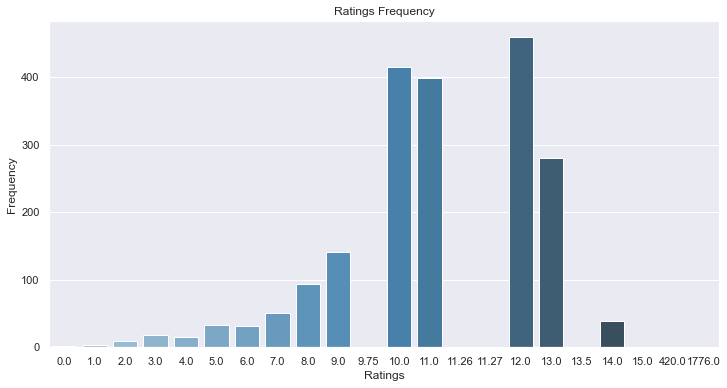

In [78]:
# Ploting a bar graph for the to show the frequency of ratings
data = dog_rating_df.rating_numerator.value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings Frequency')
plt.show()

There seems to be some outlier in the ratings like 420.0 and 1776.0. This can be further investigated using a boxplot

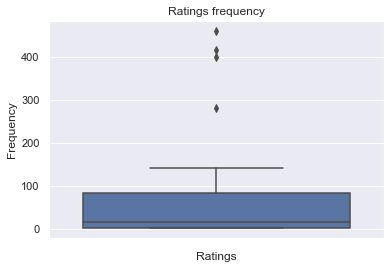

In [79]:
# Ploting a boxplot to identify the outliers in the frequency of ratings
data = dog_rating_df.rating_numerator.value_counts()

ax = sns.boxplot(y=data.values, data=data)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

From the boxplot, there are 2 outliers here which need further investigating and to check for their data

In [80]:
# Checking out the outliers in the dataset
outliers_df = dog_rating_df[dog_rating_df.rating_numerator > 400][['rating_numerator', 'name', 'jpg_url', 'text']]
outliers_df

,rating_numerator,name,jpg_url,text
771,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af....
1720,420.0,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,After so many requests... here you go.\n\nGood...


To confirm why these dogs have the outlied ratings, a look at the dogs should be done by downloading their pictures from the given URL in the `jpg_url` column

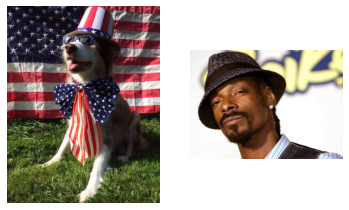

In [81]:
# Creating a folder called `images` to hold the images to be downloaded
if not os.path.exists('images'):
    os.makedirs('images')
    
# Downloading and displaying the pictures of the dogs
fig=plt.figure()
c = 1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['rating_numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

The first dog shown seem to deserve its rating as well as the American rapper Snoop Dogg. This seems to be the reason why they are outliers

### Considering the relation between `retweet_count` and `favorite_count`

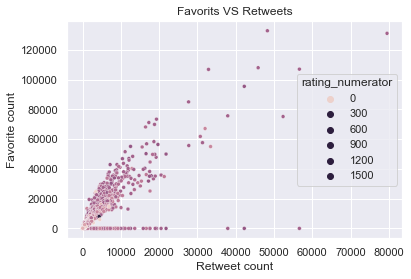

In [82]:
# Plotting a Scatter plot to show the relation between favorits and retweets
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=dog_rating_df,
                     hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

There seems to be a positive correlation between 'retweet_count' and 'favorite_count'. A further look at this using a regplot could also be used to confirm this colleration

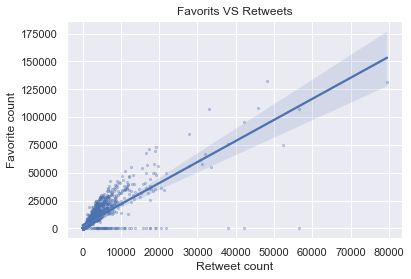

In [83]:
# Plotting a regplot to show the relation between favorits and retweets
ax = sns.regplot(x='retweet_count', y='favorite_count', data=dog_rating_df, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

The regplot shows the positive correlation between 'retweet_count' and 'favorite_count'. Therefore, the most liked dogs were retweeted most, thus the higher the like, the more the retweet.

### Comparing the numbers of the various stages of dogs

There would be the need for a bar graph function to be used for the rest of the visualization. A `plot_bar` function can be used.

In [84]:
# Defining a 'plot_bar' function.
def plot_bar(x, y, data, title = " ", xlabel = " ", ylabel = " ", rotation = 90):
    plt.figure(figsize = (10, 8))
    bar_list = sns.barplot(x=x, y=y,)
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    
    return plt.show()

In [85]:
# Showing the value count for each dog stage
dog_stage_count = dog_rating_df.dog_stage.value_counts()
dog_stage_count

pupper            210
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

'Pupper' seems to have the highest value count. This can further be presented visually using a bar plot

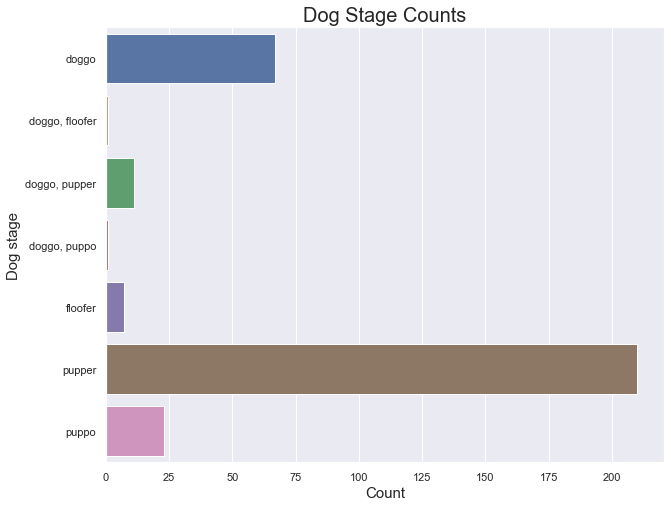

In [86]:
# Plotting a bar graph to show the numbers of the various satges of dogs
data = dog_rating_df.groupby('dog_stage').count()['tweet_id']

plot_bar(data.values, data.index, data, "Dog Stage Counts", "Count", "Dog stage");

From the bar graph, 'pupper' is the dog stage that appeared most. 

##### A further consideration of which stages of dogs were retweeted more frequently could also be done

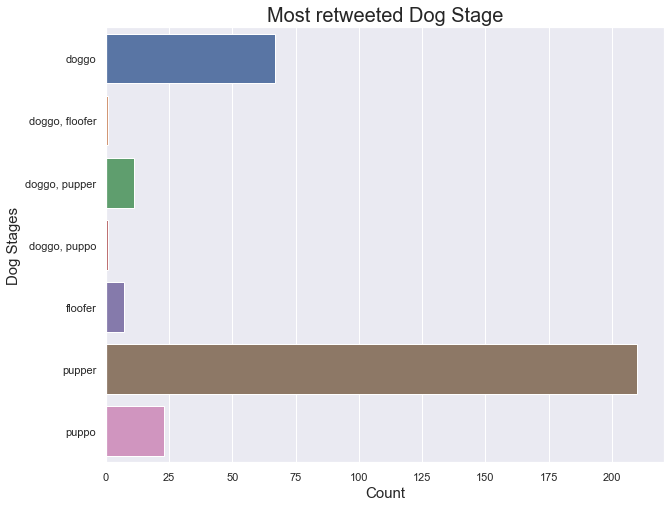

In [87]:
data = dog_rating_df.groupby('dog_stage').count()['retweet_count']
plot_bar(data.values, data.index, data, "Most retweeted Dog Stage", "Count", "Dog Stages");

Just as the dog stage count, from the bar graph, 'pupper' is the most retweeted dog stage.

### Comparing the various sources of the tweets

In [88]:
# Showing the value count for each dog stage
tweet_source_count = dog_rating_df.source.value_counts()
tweet_source_count

Twitter for iPhone    1957
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

It seems most tweets were made from iPhones. This can further be presented visually using a bar plot

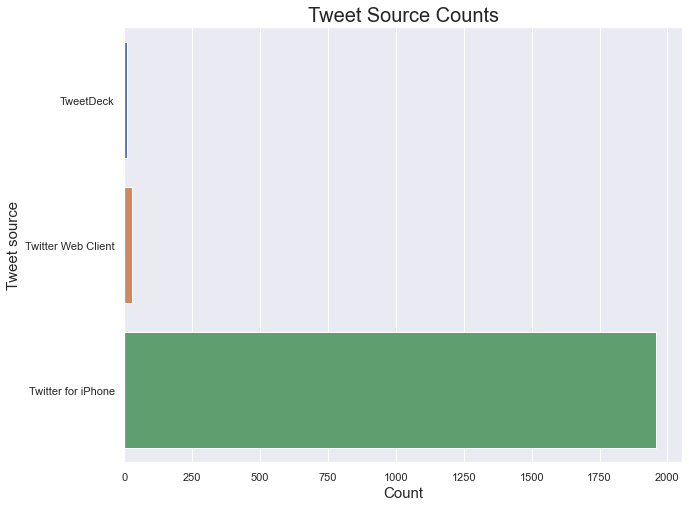

In [89]:
# Plotting a bar graph to show the numbers of the various satges of dogs
data = dog_rating_df.groupby('source').count()['tweet_id']
#ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
#ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
#plt.show()

plot_bar(data.values, data.index, data, "Tweet Source Counts", "Count", "Tweet source");

From the bar graph it can be seen that the 'Twitter for iPhone' is the highest source of tweets

### Top 12 most used dog names

In [90]:
# Getting the top 12 most used dog names
top12_dog_names = dog_rating_df.name.value_counts().head(12)
top12_dog_names

Charlie    11
Lucy       10
Penny      10
Oliver     10
Tucker     10
Cooper     10
Bo          8
Sadie       8
Winston     8
Lola        8
Toby        7
Daisy       7
Name: name, dtype: int64

Charlie appears as the most used dog name, followed by Lucy, Penny and the others. This can further be presented visually using a bar plot 

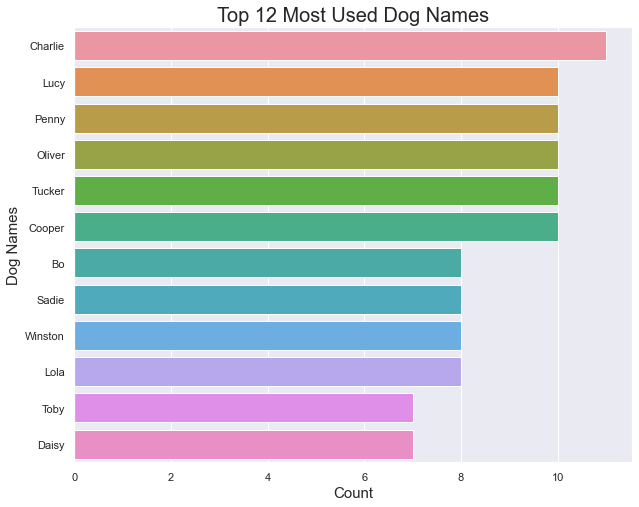

In [91]:
# Plotting a bar graph to show the top 12 most used dog names
data = top12_dog_names
plot_bar(data.values, data.index, data, "Top 12 Most Used Dog Names", "Count", "Dog Names");

The bar graph shows that Charlie, Lucy, Penny, Oliver, Tucker, Cooper, Bo, Sadie, Winston, Lola, Toby and Daisy are the top 12 most used dog names. This can further be presented visually using a bar plot

<a id='ref'></a>
# REFERENCE

- Funny youtube [video](https://www.youtube.com/watch?v=ah6fmNEtXFI) to know the difference between doggo, floofer, pupper and puppo as stages of dogs